In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
import matplotlib.pylab as plt
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('../../data/AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)

In [3]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
rolmean = data.rolling(window=12).mean()
rolstd = data.rolling(window=12).std()

In [5]:
rolmean

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,463.333333
1960-09-01,467.083333
1960-10-01,471.583333


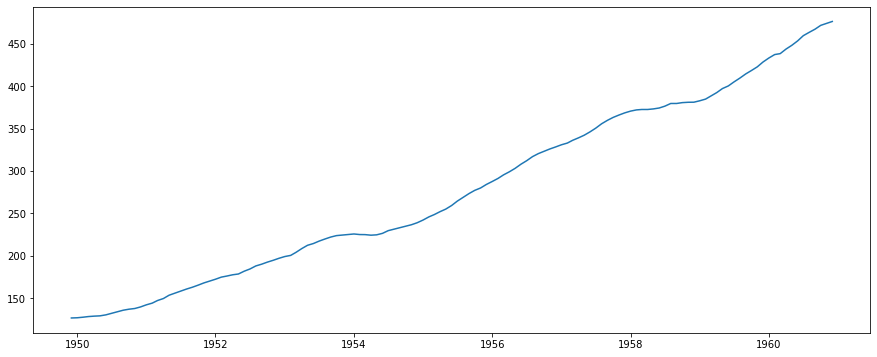

In [10]:
plt.plot(rolmean);

In [6]:
rolstd

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,83.630500
1960-09-01,84.617276
1960-10-01,82.541954


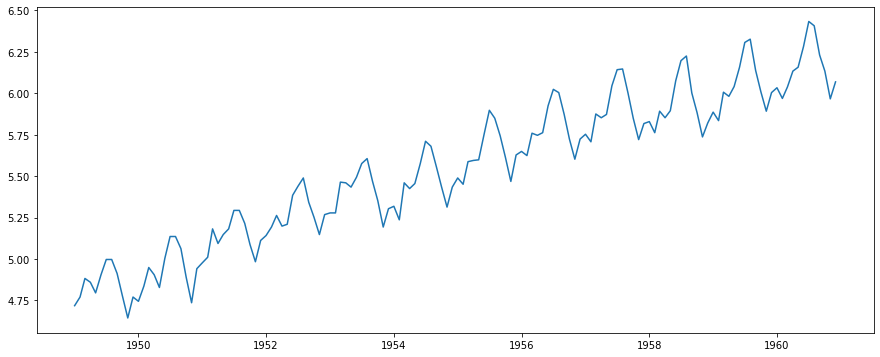

In [9]:
indexed_dataset_logscale = np.log(data)
plt.plot(indexed_dataset_logscale);

In [12]:
moving_average = indexed_dataset_logscale.rolling(window=12).mean()
moving_std = indexed_dataset_logscale.rolling(window=12).std()

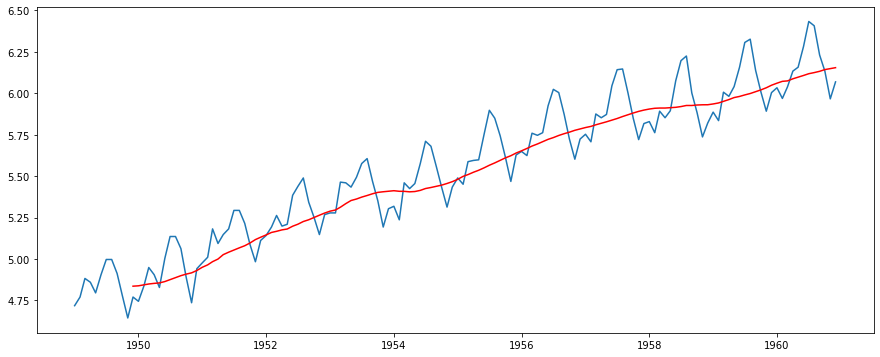

In [14]:
plt.plot(indexed_dataset_logscale)
plt.plot(moving_average, color='red');

In [16]:
dataset_logscale_minus_ma = indexed_dataset_logscale - moving_average
dataset_logscale_minus_ma.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [17]:
dataset_logscale_minus_ma.dropna(inplace=True)
dataset_logscale_minus_ma.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [28]:
def test_stationarity(time_serie):
    moving_average = time_serie.rolling(window=12).mean()
    moving_std = time_serie.rolling(window=12).std()
    
    origin = plt.plot(time_serie, color='blue', label='Original')
    mean = plt.plot(moving_average, color='red', label='Média Móvel (12m)')
    std = plt.plot(moving_std, color='black', label='Desvio Padrão')
    
    plt.legend(loc='best')
    plt.title('Média Móvel e Desvio Padrão')
    
    print('Resultados Dickey-Fuller:')
    df_test = adfuller(time_serie['#Passengers'], autolag='AIC')
    df_output = pd.Series(df_test[0:4], index=['Estatística de Teste', 'Valor de P', '# de Intervalos', '# de Observações'])
    for key, value in df_test[4].items():
        df_output['Valor Crítico ({})'.format(key)] = value
    print('')
    print(df_output)
    print('')

Resultados Dickey-Fuller:

Estatística de Teste     -3.162908
Valor de P                0.022235
# de Intervalos          13.000000
# de Observações        119.000000
Valor Crítico (1%)       -3.486535
Valor Crítico (5%)       -2.886151
Valor Crítico (10%)      -2.579896
dtype: float64



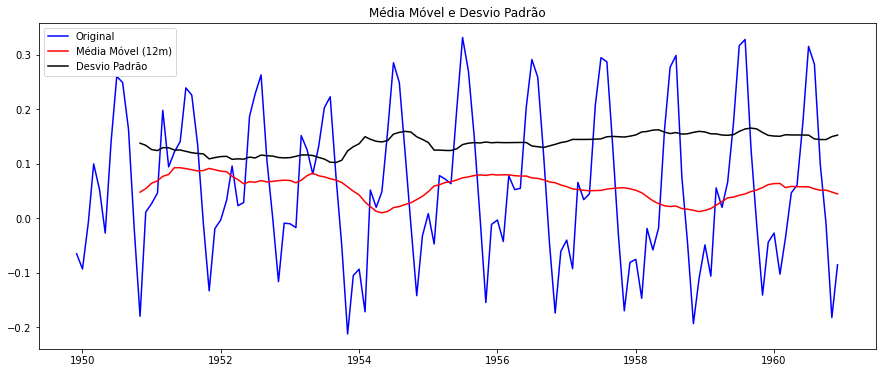

In [29]:
test_stationarity(dataset_logscale_minus_ma)

Observamos, agora, tanto visualmente quanto pelo teste de Dickey-Fuller, que a série virou estacionária.